In [140]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler, FunctionTransformer, LabelBinarizer)
from sklearn.pipeline import Pipeline
from scipy import stats
import numpy as np
from sklearn_pandas import (DataFrameMapper, cross_val_score, gen_features)

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
# load housing data
iowa_file_path = '../data/train.csv'
home_data = pd.read_csv(iowa_file_path)

In [142]:
home_data.shape

(1460, 81)

In [111]:
home_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

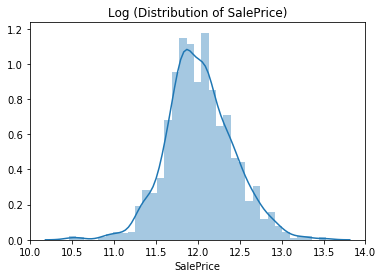

In [115]:
plt.figure()
sns.distplot(np.log1p(home_data.SalePrice))
plt.title('Log (Distribution of SalePrice)')
plt.show()

In [163]:
home_data.fillna(0, inplace=True)
numeric_cols = home_data.select_dtypes(exclude=object)
cat_cols = home_data.select_dtypes(include=object)
new_cat = cat_cols.replace(to_replace=0, value = 'NA')


In [164]:
new_cat.Alley.unique()

array(['NA', 'Grvl', 'Pave'], dtype=object)

In [166]:

label_attributes = gen_features(
     columns= new_cat.columns,
     classes=[LabelBinarizer]
)

mapper = DataFrameMapper(label_attributes, df_out = True)

result = mapper.fit_transform(new_cat)


In [169]:
result.tail()





,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1459,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
home_data.shape

In [ ]:
result.head()

In [122]:
mapper.transformed_names_

['LotFrontage_TotalBsmtSF_0',
 'LotFrontage_TotalBsmtSF_1',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenA

In [123]:
result.columns

Index(['LotFrontage_TotalBsmtSF_0', 'LotFrontage_TotalBsmtSF_1',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'Id', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'H

In [124]:
result.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: object